In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import datasets
import pandas as pd

In [2]:
def convert_score(x):
    y = []
    for i in range(len(x)):
        y.append([(199.7-0.7*x[i][0])/199])
        # y.append([201-x[i][0]])
    return np.array(y)

In [3]:
dataX = pd.read_csv('./datasets/spotofy_music_normalized.csv')
dataX.head()
m = len(dataX) # Number of  examples
X = np.array(dataX)

dataY = pd.read_csv('./datasets/spotofy_music_labels.csv')
dataY.head()
Y = np.array(dataY)
Y = convert_score(Y)

print(Y)

[[1.        ]
 [0.99648241]
 [0.99296482]
 ...
 [0.48291457]
 [0.3281407 ]
 [0.31758794]]


In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
kf = KFold(n_splits=10)
temp__ = 0.0000001
alphas1 = []
for i in range(0, 102):
    alphas1.append(temp__+ 0.00001)
    temp__ +=0.0001
res = []
for train_index, test_index in kf.split(X):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = Lasso()
    grid = dict()
    grid['alpha'] = alphas1
    grid_ = GridSearchCV(estimator=model,param_grid=dict(alpha=alphas1))
    results = grid_.fit(X_train, y_train)
    # print('Alpha: %s' % results.best_estimator_.alpha)
    clf = Lasso(alpha=results.best_estimator_.alpha)
    clf.fit(X_train, y_train)
    predictY2 = clf.predict(X_test)
    res.append([results.best_estimator_.alpha,mean_squared_error(y_test, predictY2)])
    

In [10]:
res.sort(key = lambda x: x[0])


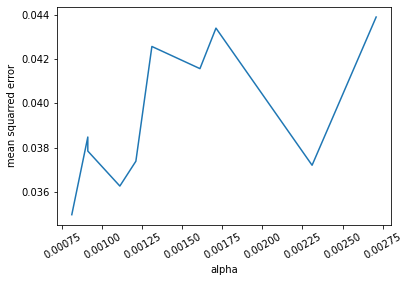

In [16]:
import matplotlib.pyplot as plt
plt.plot([i[0] for i in res], [i[1] for i in res])
plt.xlabel('alpha')
plt.ylabel('mean squarred error')
plt.xticks(rotation=30)
plt.show()

In [17]:
with open('L1.txt','w+') as f:
    f.write(str(res))